# 字符的加密
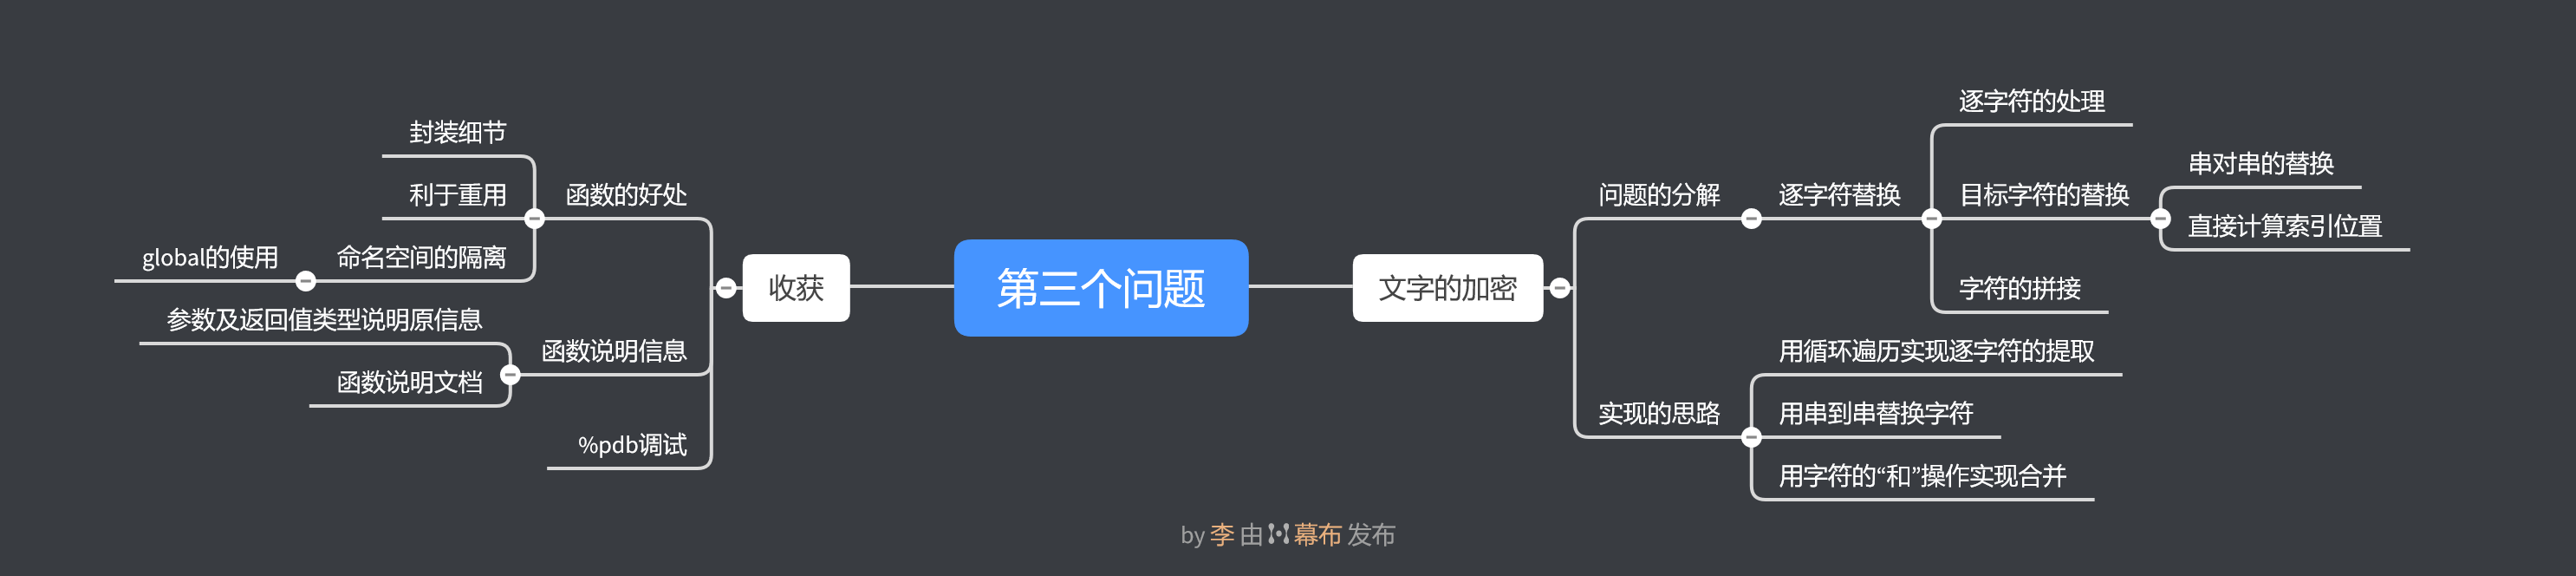

## 1. 串对串替换

In [6]:
# 偏移加密
alphabet_src = 'abcdefghijklmnopqrstuvwxyz'
alphabet_tar = 'defghijklmnopqrstuvwxyzabc'

In [2]:
src_str =  'hello world!'
encrypted_str = ''
for single_char in src_str:
    if single_char in alphabet_src:
        index = alphabet_src.index(single_char)
        encrypted_str = encrypted_str + alphabet_tar[index]
    else:
        encrypted_str = encrypted_str + single_char
print(encrypted_str)

khoor zruog!


In [3]:
# 解密
decrypted_str = ''
for single_char in encrypted_str:
    if single_char in alphabet_tar:
        index = alphabet_tar.index(single_char)
        decrypted_str = decrypted_str + alphabet_src[index]
    else:
        decrypted_str = decrypted_str + single_char
print(decrypted_str)

hello world!


In [10]:
%pdb

Automatic pdb calling has been turned ON


In [4]:
help(src_str.index)

Help on built-in function index:

index(...) method of builtins.str instance
    S.index(sub[, start[, end]]) -> int
    
    Return the lowest index in S where substring sub is found, 
    such that sub is contained within S[start:end].  Optional
    arguments start and end are interpreted as in slice notation.
    
    Raises ValueError when the substring is not found.



### 函数：
 - 封装了复杂性
 - 重用
 - 命名空间的隔离

In [25]:
def encrypIt(src_str: str) -> str: # 说明的原信息，并不修改值
    '''用于对字符串进行简单替换加密
    输入参数：
    src_str：原始文本内容
    返回结果：加密文本
    '''
    global alphabet_src, alphabet_tar
    encrypted_str = ''
    for single_char in src_str:
        if single_char in alphabet_src:
            index = alphabet_src.index(single_char)
            encrypted_str = encrypted_str + alphabet_tar[index]
        else:
            encrypted_str = encrypted_str + single_char
    return encrypted_str

def decrypIt(encrypted_str: str) -> str:
    '''用于对字符串进行简单替换解密
    输入参数：
    src_str：加密文本内容
    返回结果：原始文本
    '''
    global alphabet_src, alphabet_tar
    decrypted_str = ''
    for single_char in encrypted_str:
        if single_char in alphabet_tar:
            index = alphabet_tar.index(single_char)
            decrypted_str = decrypted_str + alphabet_src[index]
        else:
            decrypted_str = decrypted_str + single_char
    return decrypted_str

assert('abcdefghijklmnopqrstuvwxyz' == decrypIt(encrypIt('abcdefghijklmnopqrstuvwxyz')))

In [8]:
print(encrypIt('I love u!'))
print(encrypIt('I love u 2!'))
print(decrypIt(encrypIt('I love u!')))

I oryh x!
I oryh x 2!
I love u!


In [9]:
# 函数并未修改全局的值
a = 1

def mytest():
    a = 2 # 副本
    print(a)

mytest()
print(a)

def mytest2():
    global a #全局a申明
    a = 2
    print(a)
    
mytest2()
print(a)

2
1
2
2


In [16]:
help(encrypIt)

Help on function encrypIt in module __main__:

encrypIt(src_str: str) -> str
    用于对字符串进行简单替换加密
    输入参数：
    src_str：原始文本内容
    返回结果：加密文本



## 2. 直接计算索引位置

In [32]:
def encrypIt2(src_str: str) -> str: # 说明的原信息，并不修改值
    '''用于对字符串进行简单替换加密
    输入参数：
    src_str：原始文本内容
    返回结果：加密文本
    '''
    global alphabet_src
    result = ''
    for single_char in src_str:
        if single_char in alphabet_src:
            old_index = alphabet_src.index(single_char)
            new_index = (old_index + 3) % 26
            result = result + alphabet_src[new_index]
        else:
            result = result + single_char
    return result

def decrypIt2(src_str: str) -> str: # 说明的原信息，并不修改值
    '''用于对字符串进行简单替换解密
    输入参数：
    src_str：加密文本内容
    返回结果：解密文本
    '''
    global alphabet_src
    result = ''
    for single_char in src_str:
        if single_char in alphabet_src:
            old_index = alphabet_src.index(single_char)
            new_index = (old_index - 3) % 26
            result = result + alphabet_src[new_index]
        else:
            result = result + single_char
    return result

assert('abcdefghijklmnopqrstuvwxyz' == decrypIt2(encrypIt2('abcdefghijklmnopqrstuvwxyz')))

In [21]:
%pdb

Automatic pdb calling has been turned ON


In [34]:
def crypIt(src_str: str, if_decrypt:bool = False) -> str: # 说明的原信息，并不修改值
    '''用于对字符串进行简单替换加密/解密
    输入参数：
    src_str：原始文本内容
    if_decrypt：True表示解密过程，False表示加密过程
    返回结果：加密/解密文本
    '''
    global alphabet_src
    result = ''
    for single_char in src_str:
        if single_char in alphabet_src:
            old_index = alphabet_src.index(single_char)
            if if_decrypt == True:
                new_index = (old_index - 3) % 26
            else:
                new_index = (old_index + 3) % 26
            result = result + alphabet_src[new_index]
        else:
            result = result + single_char
    return result
assert('abcdefghijklmnopqrstuvwxyz' == crypIt(crypIt('abcdefghijklmnopqrstuvwxyz',True),False))